<a href="https://colab.research.google.com/github/erikaminarikova/REFRESH/blob/main/loan_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 4.7 MB/s eta 0:00:00


In [2]:
import pygad
import numpy as np
import pandas as pd
import statistics
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, mean_squared_error
from scipy import stats
import time

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Bondora_LoanData.csv', index_col=0)

In [6]:
data

,NewCreditCustomer,LoanDate,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,...,ExpectedLoss,ProbabilityOfDefault,DefaultDate,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,Rating,Status,NoOfPreviousLoansBeforeLoan
ID,,,,,,,,,,,,,,,,,,,,,
1,0,9/9/2022,27,1.0,1,3189.0,35.48,60,115.34,-1,...,0.106489,0.160200,NaN,NaN,NaN,NaN,NaN,D,Current,1.0
2,0,3/23/2016,53,1.0,1,2125.0,20.97,60,62.05,2,...,0.068500,0.122216,1/14/2020,1251.98,77.68,1251.98,64.07,C,Late,1.0
3,0,5/31/2022,25,0.0,1,531.0,25.27,60,16.67,-1,...,0.068700,0.101800,NaN,NaN,NaN,NaN,NaN,C,Current,8.0
4,0,6/25/2015,50,1.0,1,3000.0,17.12,60,84.75,3,...,0.030800,0.036400,6/2/2016,2658.82,1078.96,2730.84,2370.77,B,Repaid,1.0
5,1,1/19/2016,44,0.0,1,10630.0,13.67,60,268.57,3,...,0.023177,0.041300,12/6/2017,6456.37,1537.37,6723.01,5014.54,A,Repaid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267071,1,8/17/2015,58,1.0,1,3000.0,21.62,60,88.71,6,...,0.065200,0.077200,NaN,NaN,NaN,NaN,NaN,C,Repaid,0.0
267072,0,6/15/2015,64,0.0,1,1300.0,16.38,48,41.42,6,...,0.025500,0.030100,7/13/2016,1137.39,560.45,1137.39,984.41,A,Repaid,4.0
267073,0,7/13/2022,52,1.0,1,531.0,16.55,60,14.53,-1,...,0.037288,0.054750,NaN,NaN,NaN,NaN,NaN,B,Current,1.0


In [7]:
# prompt: From data please keep only these columns: IncomeTotal, DebtToIncome, FreeCash, ExistingLiabilities, Age, Education, MaritalStatus, EmploymentStatus, WorkExperience, AppliedAmount, Interest, LoanDuration, UseOfLoan, NoOfPreviousLoansBeforeLoan, ProbabilityOfDefault, Status, Rating

columns_to_keep = ['IncomeTotal', 'DebtToIncome', 'FreeCash', 'ExistingLiabilities', 'Age', 'Education', 'MaritalStatus', 'EmploymentStatus', 'WorkExperience', 'AppliedAmount', 'Interest', 'LoanDuration', 'UseOfLoan', 'NoOfPreviousLoansBeforeLoan', 'ProbabilityOfDefault', 'Status', 'Rating', 'ExpectedLoss']
data = data[columns_to_keep]
data

,IncomeTotal,DebtToIncome,FreeCash,ExistingLiabilities,Age,Education,MaritalStatus,EmploymentStatus,WorkExperience,AppliedAmount,Interest,LoanDuration,UseOfLoan,NoOfPreviousLoansBeforeLoan,ProbabilityOfDefault,Status,Rating,ExpectedLoss
ID,,,,,,,,,,,,,,,,,,
1,900.0,0.00,0.00,0,27,3.0,-1.0,-1.0,NaN,3189.0,35.48,60,-1,1.0,0.160200,Current,D,0.106489
2,354.0,26.29,10.92,8,53,4.0,2.0,6.0,15To25Years,2125.0,20.97,60,2,1.0,0.122216,Late,C,0.068500
3,947.0,0.00,0.00,0,25,1.0,-1.0,-1.0,NaN,531.0,25.27,60,-1,8.0,0.101800,Current,C,0.068700
4,900.0,30.58,78.80,4,50,5.0,2.0,5.0,MoreThan25Years,3000.0,17.12,60,3,1.0,0.036400,Repaid,B,0.030800
5,1200.0,26.71,349.43,7,44,4.0,4.0,5.0,MoreThan25Years,10630.0,13.67,60,3,0.0,0.041300,Repaid,A,0.023177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267071,350.0,25.35,11.29,3,58,3.0,1.0,3.0,MoreThan25Years,3000.0,21.62,60,6,0.0,0.077200,Repaid,C,0.065200
267072,867.0,56.59,116.38,8,64,4.0,1.0,4.0,15To25Years,1300.0,16.38,48,6,4.0,0.030100,Repaid,A,0.025500
267073,400.0,0.00,0.00,0,52,1.0,-1.0,-1.0,NaN,531.0,16.55,60,-1,1.0,0.054750,Current,B,0.037288


In [8]:
# prompt: I want to remove all rows in data where are one of the columns empty

data.dropna(inplace=True)
data

/tmp/ipython-input-1765681685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,IncomeTotal,DebtToIncome,FreeCash,ExistingLiabilities,Age,Education,MaritalStatus,EmploymentStatus,WorkExperience,AppliedAmount,Interest,LoanDuration,UseOfLoan,NoOfPreviousLoansBeforeLoan,ProbabilityOfDefault,Status,Rating,ExpectedLoss
ID,,,,,,,,,,,,,,,,,,
2,354.0,26.29,10.92,8,53,4.0,2.0,6.0,15To25Years,2125.0,20.97,60,2,1.0,0.122216,Late,C,0.068500
4,900.0,30.58,78.80,4,50,5.0,2.0,5.0,MoreThan25Years,3000.0,17.12,60,3,1.0,0.036400,Repaid,B,0.030800
5,1200.0,26.71,349.43,7,44,4.0,4.0,5.0,MoreThan25Years,10630.0,13.67,60,3,0.0,0.041300,Repaid,A,0.023177
7,863.0,7.36,449.47,1,42,2.0,1.0,3.0,5To10Years,1500.0,40.40,60,2,0.0,0.188726,Late,F,0.220810
8,697.0,36.04,95.81,5,34,4.0,4.0,6.0,5To10Years,1595.0,68.39,48,7,0.0,0.749511,Late,HR,0.568678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267067,2300.0,9.40,1393.89,3,38,3.0,1.0,3.0,10To15Years,2000.0,33.79,60,6,0.0,0.142712,Late,E,0.166973
267068,2172.0,69.77,5.51,19,37,4.0,3.0,3.0,15To25Years,7440.0,24.52,60,0,2.0,0.170865,Repaid,D,0.117339
267070,1550.0,30.13,67.92,7,37,3.0,3.0,3.0,15To25Years,1595.0,64.51,60,7,3.0,0.573979,Repaid,HR,0.503420


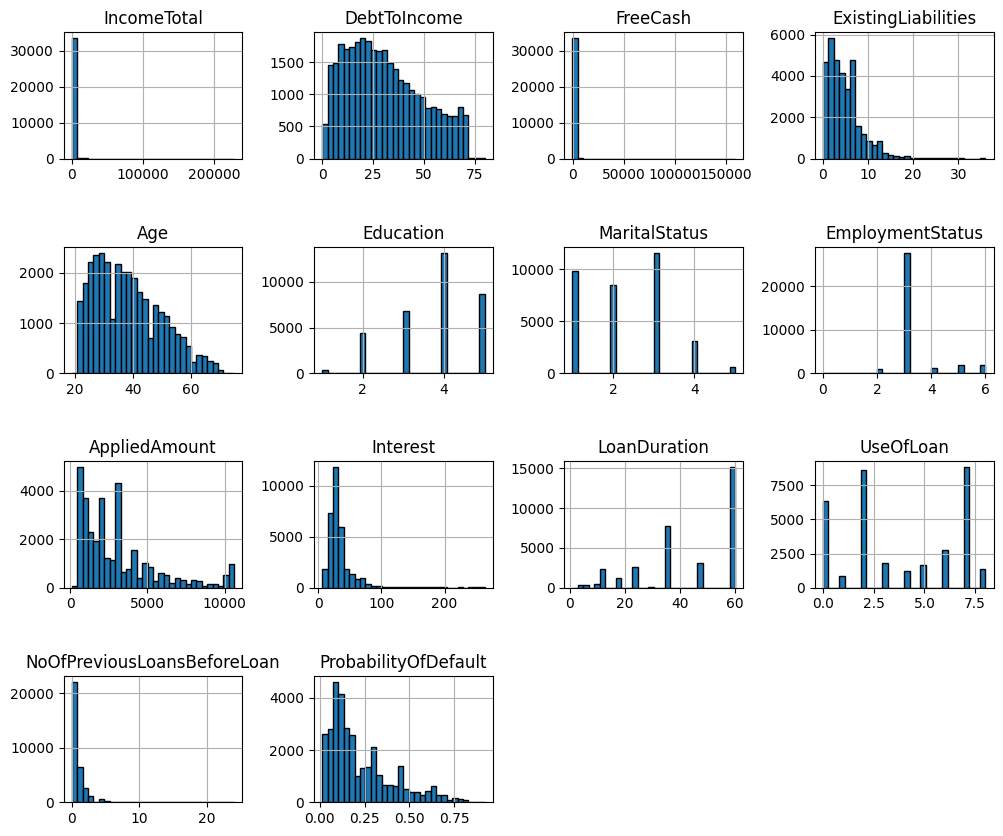

In [ ]:
# Grafical representation of distribution of attributes
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [9]:
# prompt: I want to normalize columns Age in this direction: Too young (<25) or very old (>65) can increase risk due to instability or fixed income. Mid-range (~30–55) is usually more stable. around 30-55 as 1 and then 0 if <25 and >65 between 0-1 range
# decreasing
def normalize_age(age):
    if age < 25 or age > 65:
        return 1.0
    elif 30 <= age <= 55:
        return 0.0
    elif 25 <= age < 30:
        # Linear scaling between 0 and 1 for ages 25 to 30
        return 1- (age - 25) / (30 - 25)
    elif 55 < age <= 65:
        # Linear scaling between 1 and 0 for ages 55 to 65
        return (age - 55) / (65 - 55)
    else:
        return 0.0 # Should not happen with the given ranges

data['Age_Normalized'] = data['Age'].apply(normalize_age)

# Display the first few rows with the new normalized column
print(data[['Age', 'Age_Normalized']].head())


    Age  Age_Normalized
ID                     
2    53             0.0
4    50             0.0
5    44             0.0
7    42             0.0
8    34             0.0


/tmp/ipython-input-3694964200.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_Normalized'] = data['Age'].apply(normalize_age)


In [10]:
# decreasing
education_risk_score = {
    5: 0,  # Higher education
    3: 1,  # Vocational education
    4: 2,  # Secondary education
    2: 3,  # Basic education
    1: 4   # Primary education
}

# Step 2: Normalize the values to range [0, 1]
max_val = max(education_risk_score.values())
min_val = min(education_risk_score.values())
normalized_mapping = {k: round((v - min_val) / (max_val - min_val), 3)
    for k, v in education_risk_score.items()}

# Step 3: Apply mapping
data['Education_Normalized'] = data['Education'].map(normalized_mapping)

print(data[['Education','Education_Normalized']].head())

    Education  Education_Normalized
ID                                 
2         4.0                  0.50
4         5.0                  0.00
5         4.0                  0.50
7         2.0                  0.75
8         4.0                  0.50


/tmp/ipython-input-1328073918.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education_Normalized'] = data['Education'].map(normalized_mapping)


In [11]:
# prompt: Can you filter on MaritalStatus if the value is equal to 0 and -1

data[(data['MaritalStatus'] == 0) | (data['MaritalStatus'] == -1)]

,IncomeTotal,DebtToIncome,FreeCash,ExistingLiabilities,Age,Education,MaritalStatus,EmploymentStatus,WorkExperience,AppliedAmount,Interest,LoanDuration,UseOfLoan,NoOfPreviousLoansBeforeLoan,ProbabilityOfDefault,Status,Rating,ExpectedLoss,Age_Normalized,Education_Normalized
ID,,,,,,,,,,,,,,,,,,,,


In [12]:
# Step 1: Marital status risk scores (low risk = 1, high risk = 5)
marital_status_risk_score = {
    1: 1,  # Married
    2: 2,  # Cohabitant
    5: 3,  # Widow
    4: 4,  # Divorced
    3: 5   # Single
}

# Step 2: Invert & normalize: lowest risk (1) → 0, highest risk (5) → 1
min_val = min(marital_status_risk_score.values())
max_val = max(marital_status_risk_score.values())

normalized_mapping = {
    k: round((v - min_val) / (max_val - min_val), 3)
    for k, v in marital_status_risk_score.items()
}

# Step 3: Map normalized values to the data
data['MaritalStatus_Normalized'] = data['MaritalStatus'].map(normalized_mapping)

# Step 4: Show result
print(data[['MaritalStatus', 'MaritalStatus_Normalized']].head(10))


    MaritalStatus  MaritalStatus_Normalized
ID                                         
2             2.0                      0.25
4             2.0                      0.25
5             4.0                      0.75
7             1.0                      0.00
8             4.0                      0.75
9             1.0                      0.00
10            3.0                      1.00
15            2.0                      0.25
16            1.0                      0.00
17            4.0                      0.75


/tmp/ipython-input-2664319649.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MaritalStatus_Normalized'] = data['MaritalStatus'].map(normalized_mapping)


In [13]:
# prompt: I want to normalize emplyment Status as: 1 Unemployed - 0, 2 Partially employed -0.2,  3 Fully employed - 1,  4 Self-employed- 0.6 5 Entrepreneur-0.4, 6 Retiree-0,8
# decreasing
def normalize_employment_status(status):
    if status == 1:
        return 1.0
    elif status == 2:
        return 0.8
    elif status == 3:
        return 0.0
    elif status == 4:
        return 0.4
    elif status == 5:
        return 0.6
    elif status == 6:
        return 0.2
    else:
        return 0.0 # Default for unknown status

data['EmploymentStatus_Normalized'] = data['EmploymentStatus'].apply(normalize_employment_status)

# Display the first few rows with the new normalized column
print(data[['EmploymentStatus', 'EmploymentStatus_Normalized']].head())


    EmploymentStatus  EmploymentStatus_Normalized
ID                                               
2                6.0                          0.2
4                5.0                          0.6
5                5.0                          0.6
7                3.0                          0.0
8                6.0                          0.2


/tmp/ipython-input-3899632103.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EmploymentStatus_Normalized'] = data['EmploymentStatus'].apply(normalize_employment_status)


In [14]:
#decreasing
# Step 1: Map categories to a numeric scale
experience_mapping = {
    'LessThan2Years': 6,
    '2To5Years': 5,
    '5To10Years': 4,
    '10To15Years': 3,
    '15To25Years': 2,
    'MoreThan25Years': 1
}

# Step 2: Normalize the values to range [0, 1]
max_val = max(experience_mapping.values())
min_val = min(experience_mapping.values())
normalized_mapping = {k: round((v - min_val) / (max_val - min_val), 3) for k, v in experience_mapping.items()}

# Step 3: Apply mapping
data['WorkExperience_Normalized'] = data['WorkExperience'].map(normalized_mapping)

print(data[['WorkExperience','WorkExperience_Normalized']].head())


     WorkExperience  WorkExperience_Normalized
ID                                            
2       15To25Years                        0.2
4   MoreThan25Years                        0.0
5   MoreThan25Years                        0.0
7        5To10Years                        0.6
8        5To10Years                        0.6


/tmp/ipython-input-4199766421.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WorkExperience_Normalized'] = data['WorkExperience'].map(normalized_mapping)


In [ ]:
# prompt: Can you filter on UseOfLoan if the value is equal to 0 and -1

data[(data['UseOfLoan'] == -1)]

,IncomeTotal,DebtToIncome,FreeCash,ExistingLiabilities,Age,Education,MaritalStatus,EmploymentStatus,WorkExperience,AppliedAmount,...,UseOfLoan,NoOfPreviousLoansBeforeLoan,ProbabilityOfDefault,Status,Rating,Age_Normalized,MaritalStatus_Normalized,EmploymentStatus_Normalized,normalizedWorkExperience,WorkExperience_Normalized
ID,,,,,,,,,,,,,,,,,,,,,


In [15]:
use_of_loan_risk_score = {
    1: 2,    # Real estate
    2: 2,    # Home improvement
    4: 3,    # Education
    8: 3,    # Health
    0: 4,    # Loan consolidation
    6: 4,    # Vehicle
    3: 5,    # Business
    5: 6,    # Travel
    7: 6,    # Other
    101: 5,
    102: 3,
    103: 2,
    104: 4,
    105: 4,
    106: 5,
    107: 6,
    108: 2,
    109: 6,
    110: 6
}

# Step 1: Find min and max risk scores
risk_values = list(use_of_loan_risk_score.values())
min_val = 1
max_val = 6

# Step 2: Normalize
normalized_risk_score = {
    k: round((v - min_val) / (max_val - min_val), 3) for k, v in use_of_loan_risk_score.items()
}

# Step 3: Apply mapping
data['UseOfLoan_Normalized'] = data['UseOfLoan'].map(normalized_risk_score)

print(data[['UseOfLoan','UseOfLoan_Normalized']].head())


    UseOfLoan  UseOfLoan_Normalized
ID                                 
2           2                   0.2
4           3                   0.8
5           3                   0.8
7           2                   0.2
8           7                   1.0


/tmp/ipython-input-843920279.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['UseOfLoan_Normalized'] = data['UseOfLoan'].map(normalized_risk_score)


In [16]:
# skewed total income
# Count rows where IncomeTotal is between 0 and 10,000 (inclusive)
low_income_count = data[(data['IncomeTotal'] >= 0) & (data['IncomeTotal'] <= 6000)].shape[0]

# Count the rest
rest_count = data.shape[0] - low_income_count

# Print the results
print(f"Income between 0 and 10,000: {low_income_count} rows")
print(f"All other income values: {rest_count} rows")

max_income = data['IncomeTotal'].max()
print(f"Maximum IncomeTotal: {max_income}")

Income between 0 and 10,000: 33465 rows
All other income values: 55 rows
Maximum IncomeTotal: 228550.0


Lower Bound: -76.93
Upper Bound: 1429.3925000000002


/tmp/ipython-input-1646406674.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["FreeCash_capped"] = np.where(data["FreeCash"] > upper_bound, upper_bound,


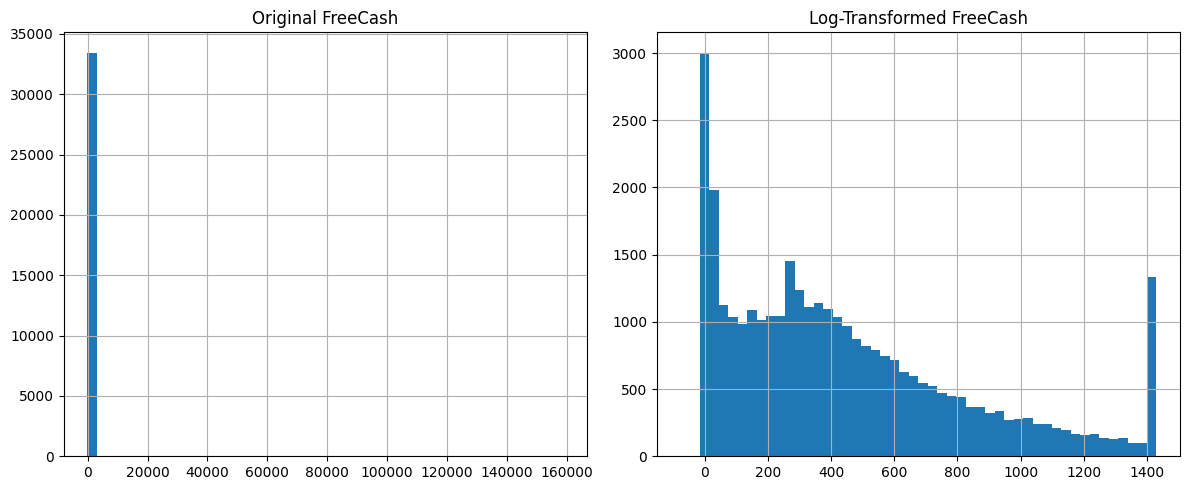

In [25]:
# 1. Identify IQR boundaries
Q1 = data["FreeCash"].quantile(0.25)
Q3 = data["FreeCash"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = min(data['FreeCash'])
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# 2. Cap outliers at boundaries
data["FreeCash_capped"] = np.where(data["FreeCash"] > upper_bound, upper_bound,
                          np.where(data["FreeCash"] < lower_bound, lower_bound, data["FreeCash"]))

# 3. Apply log transform (add 1 to avoid log(0))
# data["FreeCash_log"] = np.log1p(data["FreeCash_capped"])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
data['FreeCash'].hist(bins=50)
plt.title('Original FreeCash')

plt.subplot(1, 2, 2)
data['FreeCash_capped'].hist(bins=50)
plt.title('Log-Transformed FreeCash')

plt.tight_layout()
plt.show()


Lower Bound: 6.0
Upper Bound: 90.14225


/tmp/ipython-input-3916425605.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Interest_capped"] = np.where(data["Interest"] > upper_bound, upper_bound,


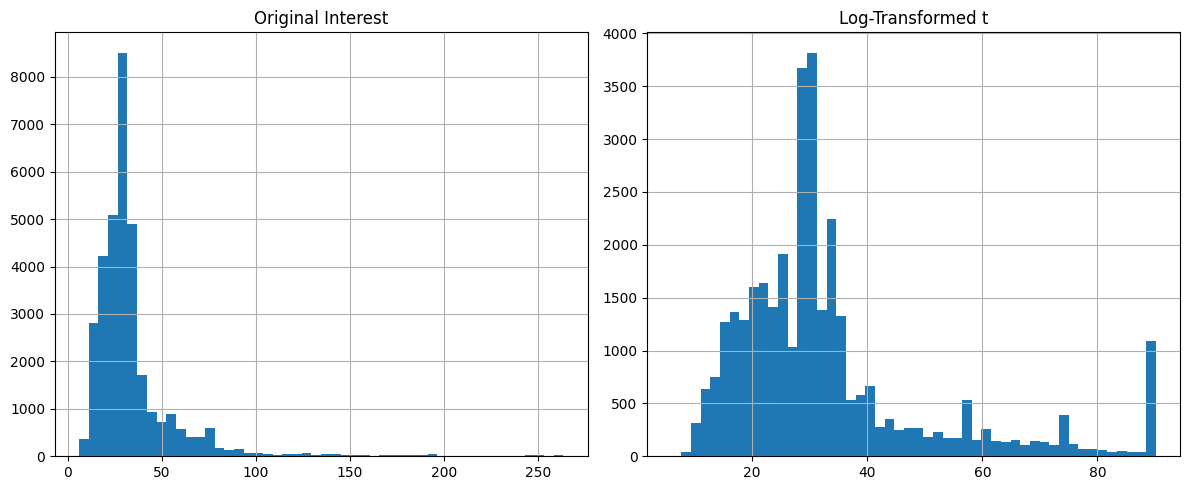

In [27]:
# 1. Identify IQR boundaries
Q1 = data["Interest"].quantile(0.15)
Q3 = data["Interest"].quantile(0.85)
IQR = Q3 - Q1

lower_bound = min(data['Interest'])
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# 2. Cap outliers at boundaries
data["Interest_capped"] = np.where(data["Interest"] > upper_bound, upper_bound,
                          np.where(data["Interest"] < lower_bound, lower_bound, data["Interest"]))

# 3. Apply log transform (add 1 to avoid log(0))
# data["FreeCash_log"] = np.log1p(data["FreeCash_capped"])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
data['Interest'].hist(bins=50)
plt.title('Original Interest')

plt.subplot(1, 2, 2)
data['Interest_capped'].hist(bins=50)
plt.title('Log-Transformed t')

plt.tight_layout()
plt.show()


Lower Bound: 200.0
Upper Bound: 4142.5


/tmp/ipython-input-2591048713.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["IncomeTotal_capped"] = np.where(data["IncomeTotal"] > upper_bound, upper_bound,


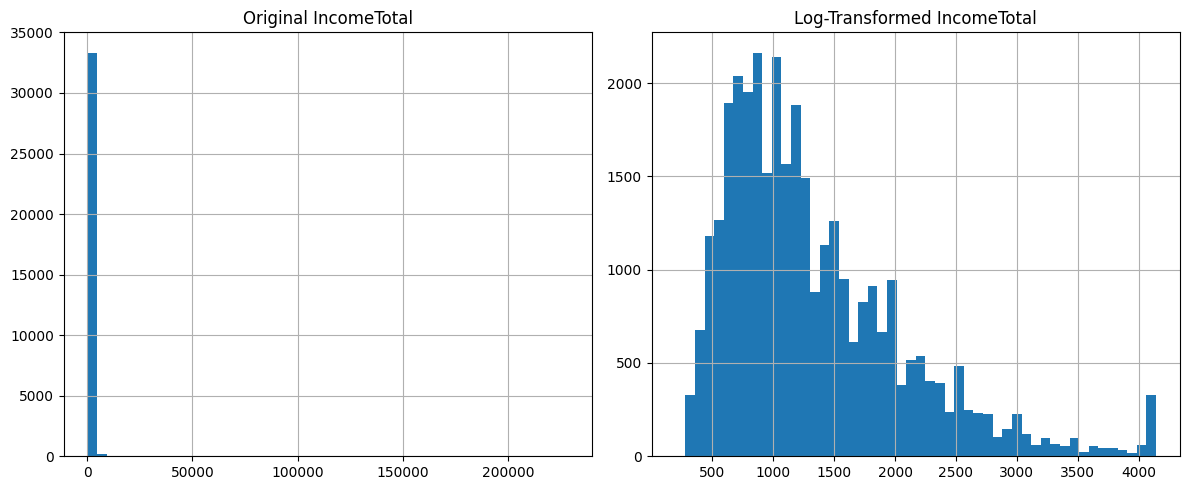

In [29]:
# 1. Identify IQR boundaries
Q1 = data["IncomeTotal"].quantile(0.15)
Q3 = data["IncomeTotal"].quantile(0.85)
IQR = Q3 - Q1

lower_bound = min(data['IncomeTotal'])
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# 2. Cap outliers at boundaries
data["IncomeTotal_capped"] = np.where(data["IncomeTotal"] > upper_bound, upper_bound,
                          np.where(data["IncomeTotal"] < lower_bound, lower_bound, data["IncomeTotal"]))

# 3. Apply log transform (add 1 to avoid log(0))
# data["FreeCash_log"] = np.log1p(data["FreeCash_capped"])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
data['IncomeTotal'].hist(bins=50)
plt.title('Original IncomeTotal')

plt.subplot(1, 2, 2)
data['IncomeTotal_capped'].hist(bins=50)
plt.title('Log-Transformed IncomeTotal')

plt.tight_layout()
plt.show()


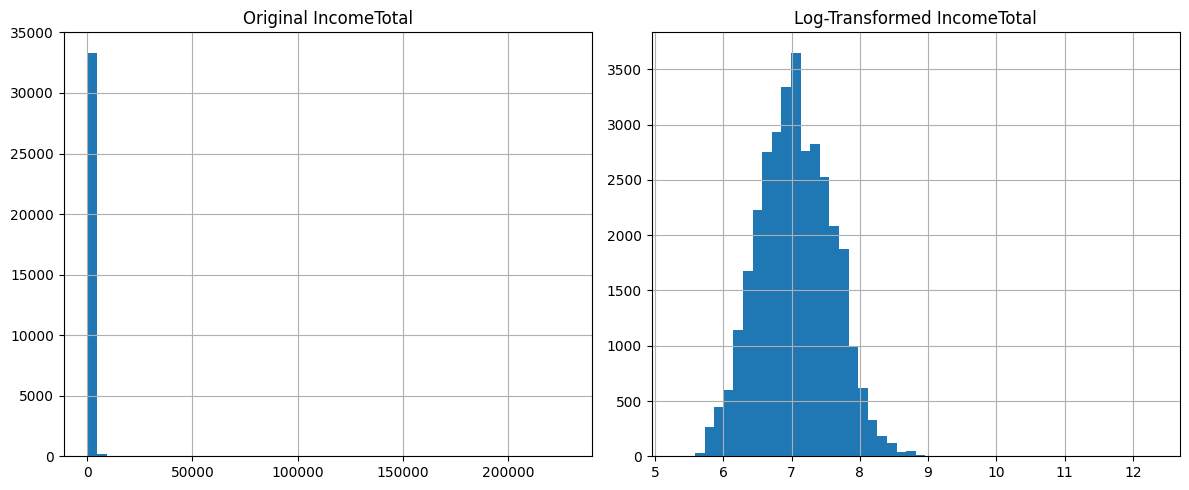

In [ ]:

# Add 1 to avoid log(0)
data['IncomeTotal_Log'] = np.log1p(data['IncomeTotal'])
data[['IncomeTotal_Log','IncomeTotal']].head()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
data['IncomeTotal'].hist(bins=50)
plt.title('Original IncomeTotal')

plt.subplot(1, 2, 2)
data['IncomeTotal_Log'].hist(bins=50)
plt.title('Log-Transformed IncomeTotal')

plt.tight_layout()
plt.show()


In [30]:
import pandas as pd

# decreasing
columns_to_keep = [
    'IncomeTotal_capped', 'FreeCash_capped',
    'NoOfPreviousLoansBeforeLoan'
]

# Normalize each column and add a new "_Normalized" version
for col in columns_to_keep:
    min_val = data[col].min()
    max_val = data[col].max()
    data[f"{col}_Normalized"] = 1- ((data[col] - min_val) / (max_val - min_val))


/tmp/ipython-input-2042730776.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{col}_Normalized"] = 1- ((data[col] - min_val) / (max_val - min_val))
/tmp/ipython-input-2042730776.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{col}_Normalized"] = 1- ((data[col] - min_val) / (max_val - min_val))
/tmp/ipython-input-2042730776.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [31]:
import pandas as pd

# increasing
columns_to_keep = [
    'DebtToIncome', 'ExistingLiabilities',
    'AppliedAmount', 'Interest_capped', 'LoanDuration', 'ProbabilityOfDefault', 'ExpectedLoss'
]

# Normalize each column and add a new "_Normalized" version
for col in columns_to_keep:
    min_val = data[col].min()
    max_val = data[col].max()
    data[f"{col}_Normalized"] = (data[col] - min_val) / (max_val - min_val)


/tmp/ipython-input-1840724221.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{col}_Normalized"] = (data[col] - min_val) / (max_val - min_val)
/tmp/ipython-input-1840724221.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{col}_Normalized"] = (data[col] - min_val) / (max_val - min_val)
/tmp/ipython-input-1840724221.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
data


,IncomeTotal,DebtToIncome,FreeCash,ExistingLiabilities,Age,Education,MaritalStatus,EmploymentStatus,WorkExperience,AppliedAmount,...,DebtToIncome_Normalized,FreeCash_Normalized,ExistingLiabilities_Normalized,AppliedAmount_Normalized,Interest_Normalized,LoanDuration_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,ProbabilityOfDefault_Normalized,ExpectedLoss_Normalized,IncomeTotal_Log
ID,,,,,,,,,,,,,,,,,,,,,
2,354.0,26.29,10.92,8,53,4.0,2.0,6.0,15To25Years,2125.0,...,0.328789,0.999447,0.222222,0.192308,0.058107,1.00000,0.958333,0.120911,0.070822,5.872118
4,900.0,30.58,78.80,4,50,5.0,2.0,5.0,MoreThan25Years,3000.0,...,0.382441,0.999019,0.111111,0.275404,0.043163,1.00000,0.958333,0.026425,0.027993,6.803505
5,1200.0,26.71,349.43,7,44,4.0,4.0,5.0,MoreThan25Years,10630.0,...,0.334042,0.997316,0.194444,1.000000,0.029771,1.00000,1.000000,0.031820,0.019332,7.090910
7,863.0,7.36,449.47,1,42,2.0,1.0,3.0,5To10Years,1500.0,...,0.092046,0.996686,0.027778,0.132953,0.133525,1.00000,1.000000,0.194141,0.243856,6.761573
8,697.0,36.04,95.81,5,34,4.0,4.0,6.0,5To10Years,1595.0,...,0.450725,0.998912,0.138889,0.141975,0.242169,0.79661,1.000000,0.811585,0.639057,6.548219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267067,2300.0,9.40,1393.89,3,38,3.0,1.0,3.0,10To15Years,2000.0,...,0.117559,0.990739,0.083333,0.180437,0.107868,1.00000,1.000000,0.143478,0.182694,7.741099
267068,2172.0,69.77,5.51,19,37,4.0,3.0,3.0,15To25Years,7440.0,...,0.872561,0.999481,0.527778,0.697056,0.071886,1.00000,0.916667,0.174475,0.126307,7.683864
267070,1550.0,30.13,67.92,7,37,3.0,3.0,3.0,15To25Years,1595.0,...,0.376813,0.999088,0.194444,0.141975,0.227109,1.00000,0.875000,0.618317,0.564920,7.346655


In [32]:
# Keep only columns that end with '_Normalized'
df_normalized = data[[col for col in data.columns if col.endswith('_Normalized')]]
df_normalized

,Age_Normalized,Education_Normalized,MaritalStatus_Normalized,EmploymentStatus_Normalized,WorkExperience_Normalized,UseOfLoan_Normalized,IncomeTotal_capped_Normalized,FreeCash_capped_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,DebtToIncome_Normalized,ExistingLiabilities_Normalized,AppliedAmount_Normalized,Interest_capped_Normalized,LoanDuration_Normalized,ProbabilityOfDefault_Normalized,ExpectedLoss_Normalized
ID,,,,,,,,,,,,,,,,
2,0.0,0.50,0.25,0.2,0.2,0.2,0.960938,0.941679,0.958333,0.328789,0.222222,0.192308,0.177913,1.00000,0.120911,0.070822
4,0.0,0.00,0.25,0.6,0.0,0.8,0.822448,0.896616,0.958333,0.382441,0.111111,0.275404,0.132157,1.00000,0.026425,0.027993
5,0.0,0.50,0.75,0.6,0.0,0.8,0.746354,0.716953,1.000000,0.334042,0.194444,1.000000,0.091155,1.00000,0.031820,0.019332
7,0.0,0.75,0.00,0.0,0.6,0.2,0.831833,0.650540,1.000000,0.092046,0.027778,0.132953,0.408831,1.00000,0.194141,0.243856
8,0.0,0.50,0.75,0.2,0.6,1.0,0.873938,0.885323,1.000000,0.450725,0.138889,0.141975,0.741482,0.79661,0.811585,0.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267067,0.0,0.25,0.00,0.0,0.4,0.6,0.467343,0.023569,1.000000,0.117559,0.083333,0.180437,0.330274,1.00000,0.143478,0.182694
267068,0.0,0.50,1.00,0.0,0.2,0.6,0.499810,0.945271,0.916667,0.872561,0.527778,0.697056,0.220103,1.00000,0.174475,0.126307
267070,0.0,0.25,1.00,0.0,0.2,1.0,0.657578,0.903839,0.875000,0.376813,0.194444,0.141975,0.695370,1.00000,0.618317,0.564920


In [33]:
data_reordered = df_normalized.iloc[:,[2,0,8,1,4,5,10,3,13,11,12,6,7,9,14,15]]
data_reordered

,MaritalStatus_Normalized,Age_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,Education_Normalized,WorkExperience_Normalized,UseOfLoan_Normalized,ExistingLiabilities_Normalized,EmploymentStatus_Normalized,LoanDuration_Normalized,AppliedAmount_Normalized,Interest_capped_Normalized,IncomeTotal_capped_Normalized,FreeCash_capped_Normalized,DebtToIncome_Normalized,ProbabilityOfDefault_Normalized,ExpectedLoss_Normalized
ID,,,,,,,,,,,,,,,,
2,0.25,0.0,0.958333,0.50,0.2,0.2,0.222222,0.2,1.00000,0.192308,0.177913,0.960938,0.941679,0.328789,0.120911,0.070822
4,0.25,0.0,0.958333,0.00,0.0,0.8,0.111111,0.6,1.00000,0.275404,0.132157,0.822448,0.896616,0.382441,0.026425,0.027993
5,0.75,0.0,1.000000,0.50,0.0,0.8,0.194444,0.6,1.00000,1.000000,0.091155,0.746354,0.716953,0.334042,0.031820,0.019332
7,0.00,0.0,1.000000,0.75,0.6,0.2,0.027778,0.0,1.00000,0.132953,0.408831,0.831833,0.650540,0.092046,0.194141,0.243856
8,0.75,0.0,1.000000,0.50,0.6,1.0,0.138889,0.2,0.79661,0.141975,0.741482,0.873938,0.885323,0.450725,0.811585,0.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267067,0.00,0.0,1.000000,0.25,0.4,0.6,0.083333,0.0,1.00000,0.180437,0.330274,0.467343,0.023569,0.117559,0.143478,0.182694
267068,1.00,0.0,0.916667,0.50,0.2,0.6,0.527778,0.0,1.00000,0.697056,0.220103,0.499810,0.945271,0.872561,0.174475,0.126307
267070,1.00,0.0,0.875000,0.25,0.2,1.0,0.194444,0.0,1.00000,0.141975,0.695370,0.657578,0.903839,0.376813,0.618317,0.564920


In [ ]:
df_normalized1 = data_reordered.drop(columns=['ProbabilityOfDefault_Normalized', 'ExpectedLoss_Normalized'])
df_normalized1['target'] = data_reordered['ExpectedLoss_Normalized']
df_normalized1

,MaritalStatus_Normalized,Age_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,Education_Normalized,WorkExperience_Normalized,UseOfLoan_Normalized,ExistingLiabilities_Normalized,EmploymentStatus_Normalized,LoanDuration_Normalized,AppliedAmount_Normalized,Interest_Normalized,IncomeTotal_Log_Normalized,FreeCash_Normalized,DebtToIncome_Normalized,target
ID,,,,,,,,,,,,,,,
2,0.25,0.0,0.958333,0.50,0.2,0.2,0.222222,0.2,1.00000,0.192308,0.058107,0.919159,0.999447,0.328789,0.070822
4,0.25,0.0,0.958333,0.00,0.0,0.8,0.111111,0.6,1.00000,0.275404,0.043163,0.786789,0.999019,0.382441,0.027993
5,0.75,0.0,1.000000,0.50,0.0,0.8,0.194444,0.6,1.00000,1.000000,0.029771,0.745942,0.997316,0.334042,0.019332
7,0.00,0.0,1.000000,0.75,0.6,0.2,0.027778,0.0,1.00000,0.132953,0.133525,0.792748,0.996686,0.092046,0.243856
8,0.75,0.0,1.000000,0.50,0.6,1.0,0.138889,0.2,0.79661,0.141975,0.242169,0.823070,0.998912,0.450725,0.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267067,0.00,0.0,1.000000,0.25,0.4,0.6,0.083333,0.0,1.00000,0.180437,0.107868,0.653536,0.990739,0.117559,0.182694
267068,1.00,0.0,0.916667,0.50,0.2,0.6,0.527778,0.0,1.00000,0.697056,0.071886,0.661670,0.999481,0.872561,0.126307
267070,1.00,0.0,0.875000,0.25,0.2,1.0,0.194444,0.0,1.00000,0.141975,0.227109,0.709595,0.999088,0.376813,0.564920


In [34]:
df_normalized2 = data_reordered.drop(columns=['ExpectedLoss_Normalized', 'ProbabilityOfDefault_Normalized'])
df_normalized2['target'] = data_reordered['ProbabilityOfDefault_Normalized']
df_normalized2

,MaritalStatus_Normalized,Age_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,Education_Normalized,WorkExperience_Normalized,UseOfLoan_Normalized,ExistingLiabilities_Normalized,EmploymentStatus_Normalized,LoanDuration_Normalized,AppliedAmount_Normalized,Interest_capped_Normalized,IncomeTotal_capped_Normalized,FreeCash_capped_Normalized,DebtToIncome_Normalized,target
ID,,,,,,,,,,,,,,,
2,0.25,0.0,0.958333,0.50,0.2,0.2,0.222222,0.2,1.00000,0.192308,0.177913,0.960938,0.941679,0.328789,0.120911
4,0.25,0.0,0.958333,0.00,0.0,0.8,0.111111,0.6,1.00000,0.275404,0.132157,0.822448,0.896616,0.382441,0.026425
5,0.75,0.0,1.000000,0.50,0.0,0.8,0.194444,0.6,1.00000,1.000000,0.091155,0.746354,0.716953,0.334042,0.031820
7,0.00,0.0,1.000000,0.75,0.6,0.2,0.027778,0.0,1.00000,0.132953,0.408831,0.831833,0.650540,0.092046,0.194141
8,0.75,0.0,1.000000,0.50,0.6,1.0,0.138889,0.2,0.79661,0.141975,0.741482,0.873938,0.885323,0.450725,0.811585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267067,0.00,0.0,1.000000,0.25,0.4,0.6,0.083333,0.0,1.00000,0.180437,0.330274,0.467343,0.023569,0.117559,0.143478
267068,1.00,0.0,0.916667,0.50,0.2,0.6,0.527778,0.0,1.00000,0.697056,0.220103,0.499810,0.945271,0.872561,0.174475
267070,1.00,0.0,0.875000,0.25,0.2,1.0,0.194444,0.0,1.00000,0.141975,0.695370,0.657578,0.903839,0.376813,0.618317


In [35]:
#ordina sums functions

# defining the generic functions for individual classes
def yes_function(x: float, y: float, a: float, kappa: float, lam: float, gamma: float = 1) -> float:
    return 1-max(0.0, (((1-x) ** kappa) + ((1-y) ** kappa) - ((1-a) ** kappa))) ** (1 / kappa)

def no_function(x: float, y: float, a: float, kappa: float, lam: float, gamma: float = 1) -> float:
        return max(0.0, ((x ** lam) + (y ** lam) - (a ** lam))) ** (1 / lam)

def maybe_function(x: float, y: float, a:float, kappa: float, lam: float, gamma: float = 1) -> float:
    if gamma == 0:
            # r = 0 means we use the geometric mean
        return 0
    elif gamma < 0:
            # r < 0 means we handle cases where x or y are 0
        if x == 0 or y == 0:
            return 0
        else:
                value = gamma*1/a*x*y+(1-gamma)*(1-1/(1-a)*(1-x)*(1-y))

    else:
            value = gamma*1/a*x*y+(1-gamma)*(1-1/(1-a)*(1-x)*(1-y))

    return statistics.median([0, 1, value])

# defining function for classification: deviding values according thir value to which fuction we use
def classification(x: float, y: float, a: float, kappa: float, lam: float, gamma: float) -> float:
    if x<a and y<a:
        value = no_function(x,y,a,1,lam,1)
    elif x>a and y>a:
        value = yes_function(x,y,a,kappa,1,1)
    else:
        value = maybe_function(x,y,a,1,1,gamma)
    return round(value,4)

In [36]:
#alg for learning parameters in ordinal sums functions
def calculate_param_using_gen_alg(data:[] = []):
    #preparing input-output data
    df = data
    columns=len(df.columns)

    def fitness_func(ga_instance, solution, solution_idx):
        param = np.array(solution)
        df['value']=df.apply(lambda row: row[0], axis =1)
        # parameters for attributes
        j=0
        while j < columns-2:
            df['value']=df.apply(lambda row: classification(row['value'], row[j+1], param[0], param[1], param[2], param[3]),
                                                            axis = 1)
            j += 1
        df['error']=df.apply(lambda row: np.abs(row['value'] - row['target']), axis=1)
        fitness = 1.0 / sum(df['error'])
        return fitness

    fitness_function = fitness_func

    num_generations = 60
    num_parents_mating = 4

    sol_per_pop = 24
    num_genes = 4 #number of learnt (tuned) parameters

    init_range_low = 0
    init_range_high = 1

    parent_selection_type = "sss"
    keep_parents = 2

    crossover_type = "single_point"

    mutation_type = "random"
    mutation_percent_genes = 15

    ga_instance = pygad.GA(num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_function,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            init_range_low=init_range_low,
                            init_range_high=init_range_high,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            crossover_type=crossover_type,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            gene_space=[{'low': 0, 'high': 1},{'low': 0, 'high': 3},
                                        {'low': 0, 'high': 3},{'low': 0, 'high': 1}])

    ga_instance.run()

    ga_instance.plot_fitness()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    #filename = 'genetic'
    #ga_instance.save(filename=filename)

    solution_param= np.array(solution)
    df['calc_value']=df.apply(lambda row: row[0], axis = 1)
    columns=len(df.columns)
    j=0
    while j < columns-5:
        df['calc_value']=df.apply(lambda row: classification(row['calc_value'], row[j+1], solution_param[0], solution_param[1], solution_param[2], solution_param[3]),
                                                        axis = 1)
        j += 1

    merge_data = df
    # merge_data.to_csv("data/output.csv")
    mean_error = (sum(merge_data['error'])) / len(merge_data)
    kappa_result = solution_param[1]
    lam_result = solution_param[2]
    gamma_result = solution_param[3]
    a_result = solution_param[0]
    return merge_data, mean_error, kappa_result, lam_result, gamma_result, a_result, solution_param, solution_fitness, solution_idx


In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Fuction to despay relevant results
def show_results(data, mean_error, gamma_result, lam_result, kappa_result, a_result):
    # calculate the mean squared error
    target_values = data[['target']].values
    value = data[['calc_value']].values
    MSE = mean_squared_error(target_values, value)
    RMSE = math.sqrt(MSE)
    # print the results
    print('Results:')
    if all(col in data.columns for col in ['value','error']):
      print(data.drop(columns=['value','error']))
    else:
      print(data)
    #print('mean error: ', mean_error)
    print('\u03B3 = ', round(gamma_result, 4))
    print('\u03BB = ', round(lam_result, 4))
    print('\u03BA = ', round(kappa_result, 4))
    print('a = ', round(a_result, 4))
    print('Mean squared error = ', round(MSE, 4))
    print('Root Mean Square Error = ', round(RMSE, 4))

In [39]:
def view_chart(a, kappa, lam):
    """ if df:
        variables_for_plot = st.multiselect('Select 2 dependent variables for plot:', df.columns, max_selections=2)
        if variables_for_plot:
            df_for_plot = df[variables_for_plot]
            x=df_for_plot.iloc[:, 0]
            y=df_for_plot.iloc[:, 1]
            plt.scatter(x,y) """
    plt.figure(figsize=(3, 3))
    plt.subplot(111)
    y = np.arange(0, 1, 0.05)
    x = [a] * len(y)
    plt.scatter(x, y, c = 'black', s = 1)

    x = np.arange(0, 1, 0.05)
    y = [a] * len(x)
    plt.scatter(x, y, c = 'black', s = 1)

    y1 = np.arange(a, 1.0, 0.001)
    b=1
    x1 = 1-((1-a)**kappa-(1-y1)**kappa)**(1/kappa)
    plt.plot(x1, y1, c = 'red')
    plt.fill_between(y1,x1, b, color='red')

    y2 = np.arange(0, a, 0.01)
    x2 = ((a**lam)-(y2**lam))**(1/lam)
    plt.plot(y2, x2, c = 'green')
    plt.fill_between(y2,x2,color='green')

    # y3 = np.arange(a, 1.01, 0.01)
    # x3 = 1-(((1-a)**kappa)-((1-y3)**kappa))**(1/kappa)
    # z = np.min(b, x2)
    # plt.fill_between(y3,x3,y2=0, color='blue')

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.annotate('D', xy=(a, a), xytext=(a + 0.2, a + 0.2), fontsize=12)
    plt.annotate('C', xy=(a, a), xytext=(a - 0.3, a - 0.3), fontsize=12)
    plt.annotate('Avg', xy=(a, a), xytext=(a - 0.3, a + 0.2), fontsize=12)
    plt.annotate('Avg', xy=(a, a), xytext=(a + 0.2, a - 0.3), fontsize=12)

    plt.annotate('a', xy=(a, a), xytext=(a - 0.04, a - 0.63), fontsize=12)
    plt.annotate('a', xy=(a, a), xytext=(a - 0.63, a - 0.04), fontsize=12)

    return (plt)

In [40]:
def calculate_tests(target_values, value):
  print('Accuracy score = ', accuracy_score(target_values, value))
  print('F1 = ', f1_score(target_values, value, average= 'macro'))
  print('Precision = ', precision_score(target_values, value, average= 'macro'))
  print('Recall = ', recall_score(target_values, value, average= 'macro'))
  #confusion matrix
  confusion_matrix = metrics.confusion_matrix(target_values, value)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
  cm_display.plot()
  plt.show()

In [41]:
df_train, df_test = train_test_split(df_normalized2, test_size=0.90, random_state=2)

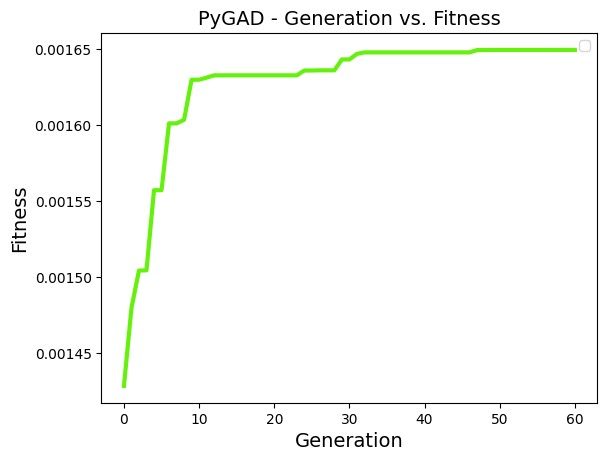

Results:
        MaritalStatus_Normalized  Age_Normalized  \
ID                                                 
21935                       1.00             0.6   
266154                      1.00             0.6   
14630                       1.00             0.0   
6442                        0.25             0.0   
12754                       0.25             1.0   
...                          ...             ...   
22985                       1.00             0.0   
35123                       1.00             1.0   
34384                       1.00             0.4   
10556                       1.00             1.0   
27812                       0.75             0.2   

        NoOfPreviousLoansBeforeLoan_Normalized  Education_Normalized  \
ID                                                                     
21935                                 1.000000                  0.50   
266154                                1.000000                  0.00   
14630                     

In [42]:
start_time = time.time()
merge_data, mean_error, kappa_result, lam_result, gamma_result, a_result, sol_param, solution_fitness, solution_idx = calculate_param_using_gen_alg(df_train)

show_results(merge_data, mean_error, gamma_result, lam_result, kappa_result, a_result)
print("Parameters of the best solution : {solution_idx}".format(solution_idx=solution_idx))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

print('time:', (time.time()-start_time)/60)

In [ ]:
merge_data

,MaritalStatus_Normalized,Age_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,Education_Normalized,WorkExperience_Normalized,UseOfLoan_Normalized,ExistingLiabilities_Normalized,EmploymentStatus_Normalized,LoanDuration_Normalized,AppliedAmount_Normalized,Interest_Normalized,IncomeTotal_Log_Normalized,FreeCash_Normalized,DebtToIncome_Normalized,target,value,error,calc_value
ID,,,,,,,,,,,,,,,,,,
24915,1.00,0.0,1.000000,0.50,0.2,0.4,0.083333,0.0,0.288136,0.242640,0.044599,0.651147,0.995332,0.280390,0.049919,0.0902,0.040281,0.0754
24716,1.00,0.2,1.000000,0.75,0.6,1.0,0.305556,0.0,0.593220,0.192308,0.074875,0.812480,0.999443,0.800025,0.107616,0.3709,0.263284,0.2241
36480,0.75,0.0,0.833333,0.50,0.2,0.2,0.250000,0.0,1.000000,0.182336,0.027831,0.800350,0.998178,0.508129,0.037308,0.2072,0.169892,0.1411
36010,1.00,1.0,1.000000,0.00,0.6,0.8,0.027778,0.0,0.796610,0.595916,0.114893,0.734575,0.995499,0.261631,0.185816,0.0864,0.099416,0.0704
35813,1.00,0.0,1.000000,0.50,0.2,0.6,0.250000,0.0,1.000000,1.000000,0.048403,0.795237,0.999277,0.820160,0.074117,0.4066,0.332483,0.2485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22985,1.00,0.0,0.958333,0.75,0.6,0.4,0.111111,0.0,1.000000,0.091168,0.092109,0.719067,0.994759,0.167709,0.175741,0.0544,0.121341,0.0450
35123,1.00,1.0,1.000000,0.50,0.8,0.4,0.111111,0.0,0.593220,0.292972,0.084035,0.803508,0.998518,0.612056,0.105927,0.2508,0.144873,0.1698
34384,1.00,0.4,1.000000,0.50,0.8,0.6,0.083333,0.0,0.593220,0.171890,0.056864,0.756374,0.995470,0.155328,0.075366,0.0531,0.022266,0.0416


In [43]:
merge_data.to_csv("/content/drive/MyDrive/Colab Notebooks/data/output_data_loan_refresh_3_resolve_scew1.csv")

In [44]:
merge_data

,MaritalStatus_Normalized,Age_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,Education_Normalized,WorkExperience_Normalized,UseOfLoan_Normalized,ExistingLiabilities_Normalized,EmploymentStatus_Normalized,LoanDuration_Normalized,AppliedAmount_Normalized,Interest_capped_Normalized,IncomeTotal_capped_Normalized,FreeCash_capped_Normalized,DebtToIncome_Normalized,target,value,error,calc_value
ID,,,,,,,,,,,,,,,,,,
21935,1.00,0.6,1.000000,0.50,0.6,1.0,0.027778,0.0,0.033898,0.040836,0.610157,0.852632,0.792229,0.312156,0.713414,0.4557,0.257714,0.0960
266154,1.00,0.6,1.000000,0.00,0.6,1.0,0.166667,0.0,1.000000,1.000000,0.302583,0.603551,0.797268,0.713982,0.127483,1.0000,0.872517,0.3814
14630,1.00,0.0,0.958333,0.00,0.6,1.0,0.166667,0.0,1.000000,0.047483,0.332770,0.543437,0.101607,0.077289,0.058795,0.0044,0.054395,0.0001
6442,0.25,0.0,1.000000,0.25,0.6,0.6,0.277778,0.0,1.000000,0.227920,0.261462,0.870894,0.776987,0.615558,0.544131,0.8275,0.283369,0.2140
12754,0.25,1.0,1.000000,0.00,0.8,0.6,0.166667,0.0,0.389831,0.189934,0.309001,0.683703,0.743441,0.550900,0.079935,0.3486,0.268665,0.0807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22985,1.00,0.0,0.958333,0.75,0.6,0.4,0.111111,0.0,1.000000,0.091168,0.282022,0.682942,0.447349,0.167709,0.230250,0.0900,0.140250,0.0097
35123,1.00,1.0,1.000000,0.50,0.8,0.4,0.111111,0.0,0.593220,0.292972,0.257302,0.847812,0.843719,0.612056,0.192960,0.7862,0.593240,0.1920
34384,1.00,0.4,1.000000,0.50,0.8,0.6,0.083333,0.0,0.593220,0.171890,0.174110,0.767914,0.522406,0.155328,0.128009,0.0812,0.046809,0.0133


In [52]:
# label calculated value to the 3 clasees yes-1, no-0, maybe-2
merge_data['target_class'] = merge_data.apply(lambda row: 0 if (row['target']<=0.10) else 1, axis=1)
merge_data['calc_value_class'] = merge_data.apply(lambda row: 0 if (row['calc_value']<=0.10) else 1, axis=1)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

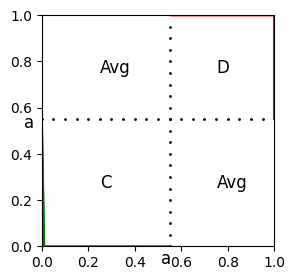

In [53]:
view_chart(0.5521,0.0118, 0.0003)

In [54]:
#prepare data for tests
target_values = merge_data[['target_class']].values
value = merge_data[['calc_value_class']].values

Accuracy score =  0.498508353221957
F1 =  0.4915906968703394
Precision =  0.5394888681653776
Recall =  0.5463116847143957


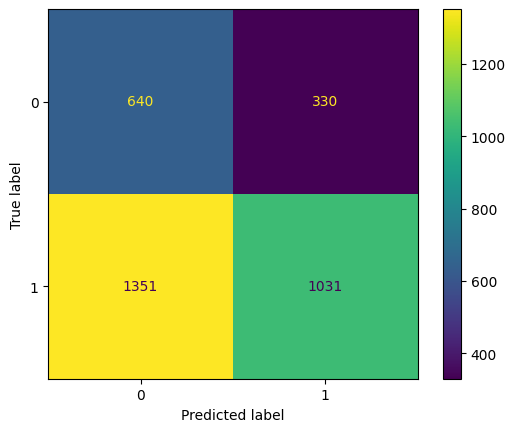

In [55]:
calculate_tests(target_values, value)